<a href="https://colab.research.google.com/github/alimoradi9150/basic-machine-learning/blob/master/Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [0]:
# The path to the CSV file containing the the features of 1067 cars
path="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv"

In [0]:
# Read the CSV file into a dataframe
df = pd.read_csv(path)

In [4]:
# Print the first five (5) rows of the dataframe
print(df.head())

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

In [5]:
# Let's get some information about our dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.4+ KB
None


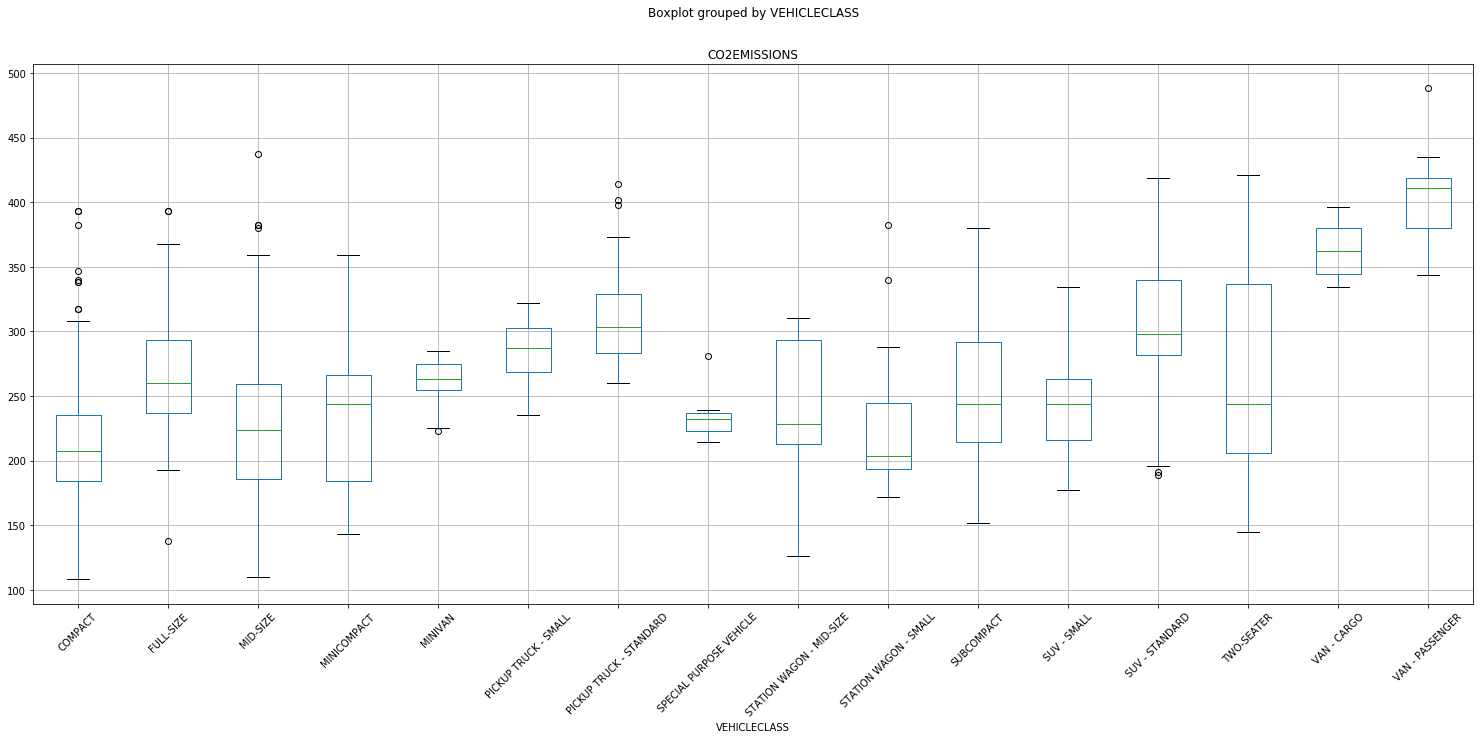

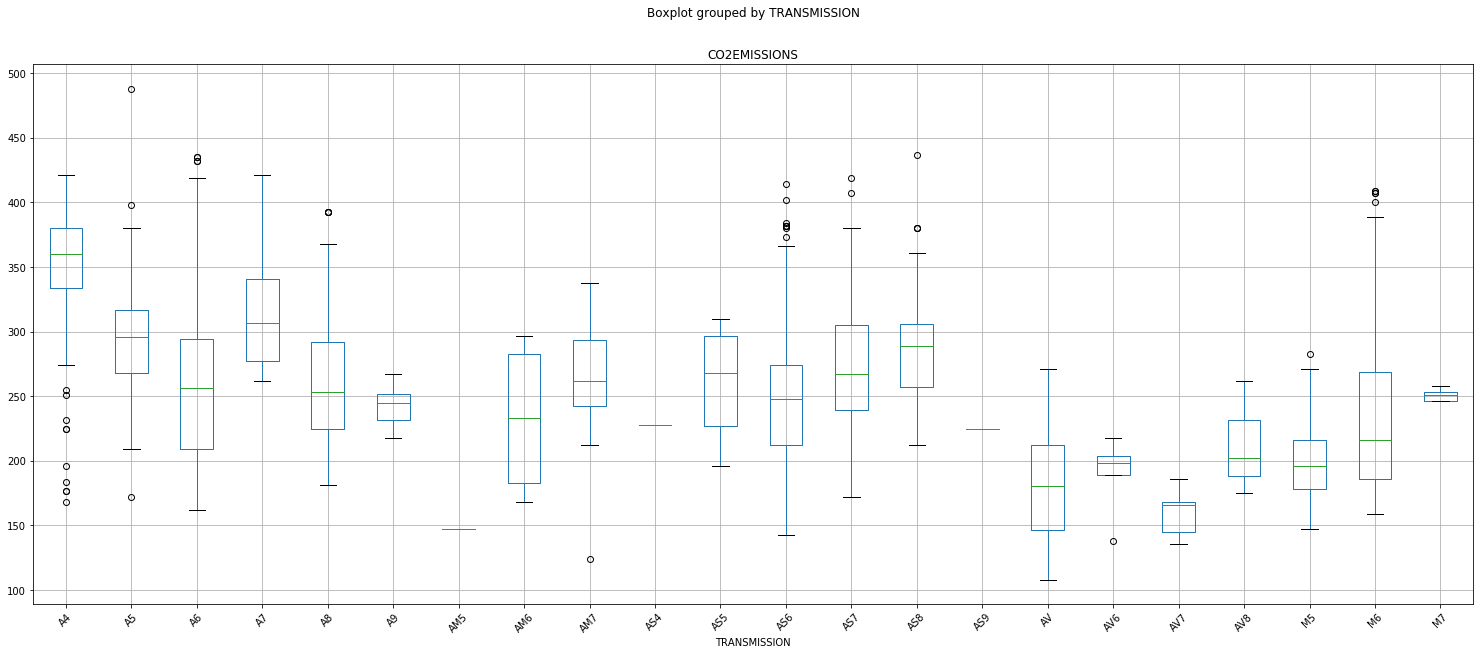

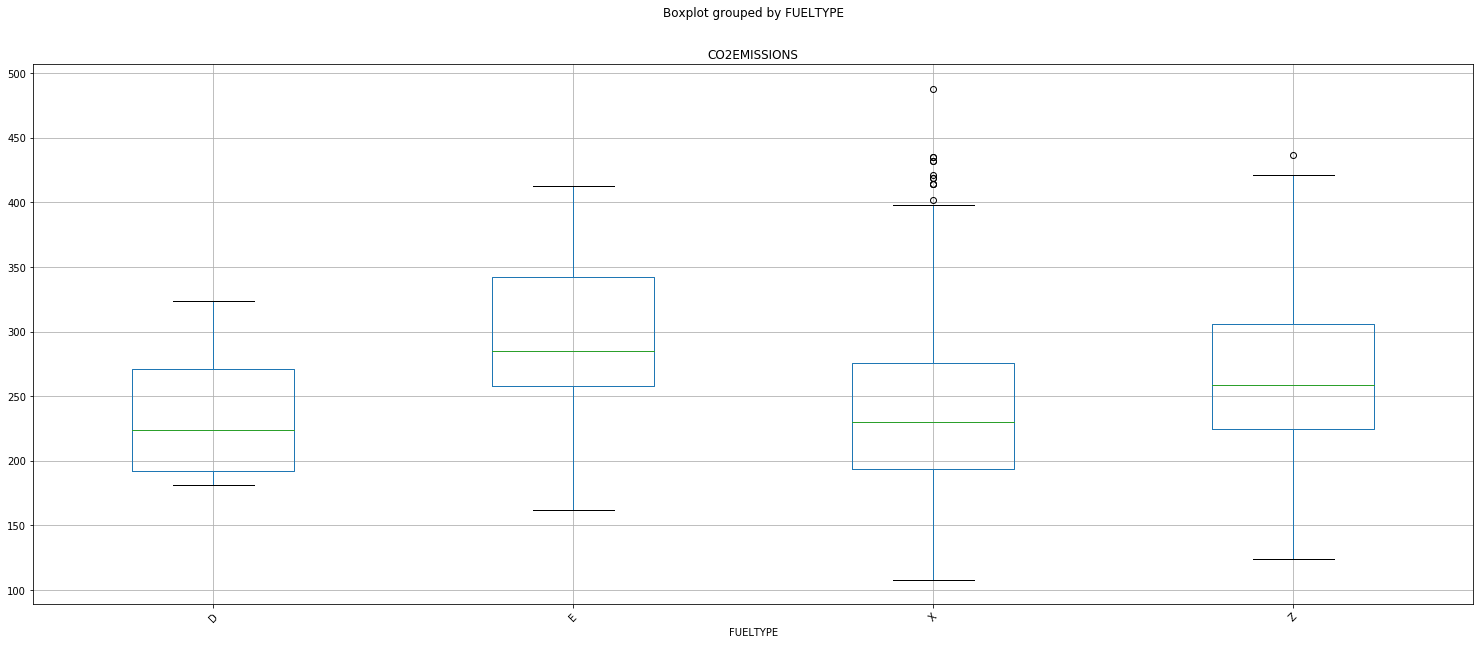

In [6]:
# Now, let's investigate the categorical variables. First, we will use boxplot to plot the relationship between the categorical variables and the CO2 emissions.

df.boxplot("CO2EMISSIONS", "VEHICLECLASS", rot=45, figsize=(25,10))

df.boxplot("CO2EMISSIONS", "TRANSMISSION", rot=45, figsize=(25,10))

df.boxplot("CO2EMISSIONS", "FUELTYPE", rot=45, figsize=(25,10))

In [7]:
# At the first glance, it does not seem like that at least the TRANSMISSION is a significant predictor for the CO2 emission.
# Honestly, it does not seem like that any of the categorical variables are great predictors.
# FUELTYPE and VEHICLECLASS may be okay predictors. I will only focus on the FUELTYPE as the other two consist of way too many distinct categories.
# One-Hot encoding will next be used to convert the FUELTYPE data into numerical data. But I will first make a copy of the the columns that I want to work with in a separate dataframe.
# Also, we drop the FUELCONSUMPTION_COMB as it is not an independent variable by itself. It is a function of the other two fuel consumption rates.

df_X = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELTYPE"]].copy()
print(df_X.head())

   ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY FUELTYPE
0         2.0          4                   9.9                  6.7        Z
1         2.4          4                  11.2                  7.7        Z
2         1.5          4                   6.0                  5.8        Z
3         3.5          6                  12.7                  9.1        Z
4         3.5          6                  12.1                  8.7        Z


In [8]:
# Now, let's use the One-Hot encoding method.

df_X = pd.get_dummies(df_X, columns=["FUELTYPE"], prefix = ["FUELTYPE"])
print(df_X.head())

   ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0         2.0          4                   9.9                  6.7   
1         2.4          4                  11.2                  7.7   
2         1.5          4                   6.0                  5.8   
3         3.5          6                  12.7                  9.1   
4         3.5          6                  12.1                  8.7   

   FUELTYPE_D  FUELTYPE_E  FUELTYPE_X  FUELTYPE_Z  
0           0           0           0           1  
1           0           0           0           1  
2           0           0           0           1  
3           0           0           0           1  
4           0           0           0           1  


In [9]:
# We then standardize the data using the StandardScaler function. I am going to make a second copy of the predictor dataframe.
# Although, I know it is unnecessary, I have found that doing so will save me the headache of running the whole notebook again if I make a mistake.
# By the way, I am saving the scaler to remember the scaling of my data so I can apply it to future values.

X = df_X.copy()
Scaler = preprocessing.StandardScaler().fit(X)
X = Scaler.transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [10]:
# Now, I will convert this new array X to a dataframe and add the CO2EMISSION column of the original dataframe to this newly-created dataframe so that I can check for the correlations.

df_cor_check = pd.concat([pd.DataFrame(X), df.CO2EMISSIONS], axis=1)
print(df_cor_check.head())

          0         1         2         3         4         5         6  \
0 -0.951292 -0.998969 -0.828558 -0.993341 -0.161126 -0.307179 -0.964093   
1 -0.668653 -0.998969 -0.511433 -0.635329 -0.161126 -0.307179 -0.964093   
2 -1.304591 -0.998969 -1.779932 -1.315552 -0.161126 -0.307179 -0.964093   
3  0.108606  0.114242 -0.145519 -0.134112 -0.161126 -0.307179 -0.964093   
4  0.108606  0.114242 -0.291885 -0.277317 -0.161126 -0.307179 -0.964093   

          7  CO2EMISSIONS  
0  1.207694           196  
1  1.207694           221  
2  1.207694           136  
3  1.207694           255  
4  1.207694           244  


In [11]:
# Now, let's add some headers to this dataframe. I am going to extract the headers from the dataframe df_X and use that list.

headers_list = df_X.columns.values.tolist()

# Also, let's add CO2EMISSIONS  to the end of this list as we know it is the header for the last column.

headers_list.append("CO2EMISSIONS")
print(headers_list)

['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELTYPE_D', 'FUELTYPE_E', 'FUELTYPE_X', 'FUELTYPE_Z', 'CO2EMISSIONS']


In [12]:
# Now, we add this complete headers list to our dataframe.

df_cor_check.columns = headers_list
print(df_cor_check.head())

   ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0   -0.951292  -0.998969             -0.828558            -0.993341   
1   -0.668653  -0.998969             -0.511433            -0.635329   
2   -1.304591  -0.998969             -1.779932            -1.315552   
3    0.108606   0.114242             -0.145519            -0.134112   
4    0.108606   0.114242             -0.291885            -0.277317   

   FUELTYPE_D  FUELTYPE_E  FUELTYPE_X  FUELTYPE_Z  CO2EMISSIONS  
0   -0.161126   -0.307179   -0.964093    1.207694           196  
1   -0.161126   -0.307179   -0.964093    1.207694           221  
2   -0.161126   -0.307179   -0.964093    1.207694           136  
3   -0.161126   -0.307179   -0.964093    1.207694           255  
4   -0.161126   -0.307179   -0.964093    1.207694           244  


In [13]:
# Let's print the correlation matrix of the dataframe
print(df_cor_check.corr())

                      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  \
ENGINESIZE              1.000000   0.934011              0.832225   
CYLINDERS               0.934011   1.000000              0.796473   
FUELCONSUMPTION_CITY    0.832225   0.796473              1.000000   
FUELCONSUMPTION_HWY     0.778746   0.724594              0.965718   
FUELTYPE_D             -0.093400  -0.067955             -0.139180   
FUELTYPE_E              0.237674   0.194920              0.567070   
FUELTYPE_X             -0.266920  -0.339827             -0.319701   
FUELTYPE_Z              0.165557   0.256011              0.045660   
CO2EMISSIONS            0.874154   0.849685              0.898039   

                      FUELCONSUMPTION_HWY  FUELTYPE_D  FUELTYPE_E  FUELTYPE_X  \
ENGINESIZE                       0.778746   -0.093400    0.237674   -0.266920   
CYLINDERS                        0.724594   -0.067955    0.194920   -0.339827   
FUELCONSUMPTION_CITY             0.965718   -0.139180    0.567070 

In [14]:
# Well, this is a little bit embarrassing. We went through a lot of hassles to convert the FUELTYPE column to numerical values but it seems like that it is not a significat predictor for CO2EMISSION.
# But thankfully, all of the other variables have significant correlation with CO2EMISSION. So, we will keep them but we need to drop the columns corresponding to the different fuel types from the X array.

X = X[:,[0,1,2,3]]
print(X)

[[-0.9512918  -0.99896853 -0.82855772 -0.99334135]
 [-0.66865251 -0.99896853 -0.5114328  -0.63532912]
 [-1.30459092 -0.99896853 -1.77993246 -1.31555236]
 ...
 [-0.24469358  0.11424235  0.02524013  0.11649658]
 [-0.10337393  0.11424235 -0.09673099 -0.06250954]
 [-0.10337393  0.11424235  0.3911535   0.25970147]]


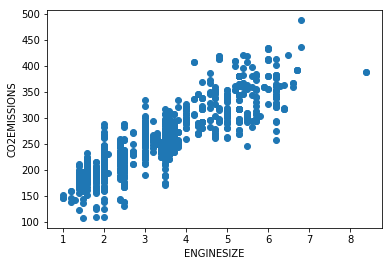

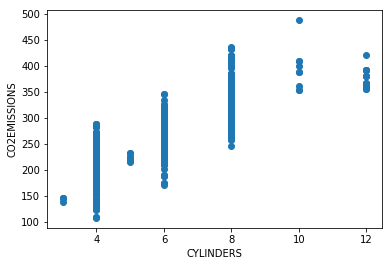

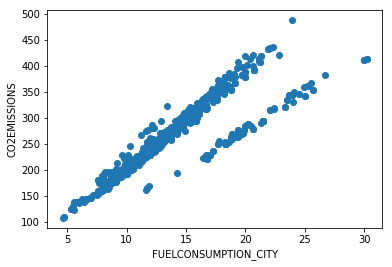

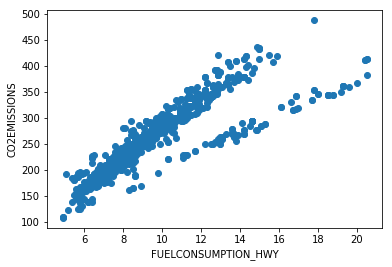

In [15]:
# Let's first plot the CO2 emmision as a function of each of these variable to see whether the relationship is linear or not.

fig1, ax1 = plt.subplots()
plt.scatter(df[['ENGINESIZE']], df[['CO2EMISSIONS']])
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

fig2, ax2 = plt.subplots()
plt.scatter(df[['CYLINDERS']], df[['CO2EMISSIONS']])
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

fig3, ax3 = plt.subplots()
plt.scatter(df[['FUELCONSUMPTION_CITY']], df[['CO2EMISSIONS']])
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('CO2EMISSIONS')
plt.show()

fig4, ax4 = plt.subplots()
plt.scatter(df[['FUELCONSUMPTION_HWY']], df[['CO2EMISSIONS']])
plt.xlabel('FUELCONSUMPTION_HWY')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [16]:
# First, let's extract the CO2EMISSIONS into a y array

y = np.asanyarray(df[["CO2EMISSIONS"]])
print(y)

[[196]
 [221]
 [136]
 ...
 [271]
 [260]
 [294]]


In [0]:
# Now, let's see what is the best degree of polynimal that best represent the relationship between each variable and CO2EMISSION.
# In order to find the best degree of polynomial we need to calculate the error for each model and then find the order of the polynomial that corresponds to the minimum error.

#P.S. I understand that for this dataset, the multipolynomial regression for ENGINESIZE, FUELCONSUMPTION_CITY & FUELCONSUMPTION_HWY will be erroneous because if for some of the independent variables we have multiple dependent output,
#i.e. CO2COMMISIONS. Performing a multipolynomial regression in this case will most probably leads to an overfitting. However, for the sake of representation, we will do it anyway.

# First, we plit our dataset into the training and test sets.

from sklearn.model_selection import train_test_split
X_ENGINESIZE = X[:,0]
X_train, X_test, y_train, y_test = train_test_split(X_ENGINESIZE, y, test_size=0.2, random_state=0)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [0]:
# We start by importing the relevant libraries.

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# The method that I will be using to determine the best order of the polynimal is to fit the data on each order and pick the order with the best performance, i.e. the lowest RMSE.

rmses = []
degrees = np.arange(1, 5)
min_rmse, min_deg = 1e10, 0

for deg in degrees:
  
  # Train features
  poly_features = PolynomialFeatures(degree=deg)
  x_poly_train = poly_features.fit_transform(X_train)
  
  # Linear regression
  poly_reg = LinearRegression()
  poly_reg.fit(x_poly_train, y_train)
  
  # Compare with test data
  x_poly_test = poly_features.fit_transform(X_test)
  poly_predict = poly_reg.predict(x_poly_test)
  poly_mse = mean_squared_error(y_test, poly_predict)
  poly_rmse = np.sqrt(poly_mse)
  rmses.append(poly_rmse)
  
  # Cross-validation of degree
  if min_rmse > poly_rmse:
    min_rmse = poly_rmse
    min_deg = deg

Best degree 2 with RMSE 34.15


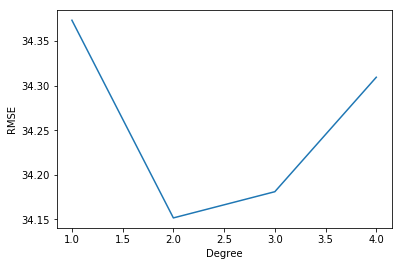

In [19]:
# Plot and present results
print('Best degree {} with RMSE {:.2f}'.format(min_deg, min_rmse))

fig5, ax5 = plt.subplots()
plt.plot(degrees, rmses)
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.show()

In [20]:
# Le's create a dataframe that will store the results of our tests.

SVR_results = pd.DataFrame({"Independent Variable":["ENGINESIZE"], "Order of Polynomial":[min_deg], "RMSE":[min_rmse]})
print(SVR_results)

  Independent Variable  Order of Polynomial       RMSE
0           ENGINESIZE                    2  34.151673


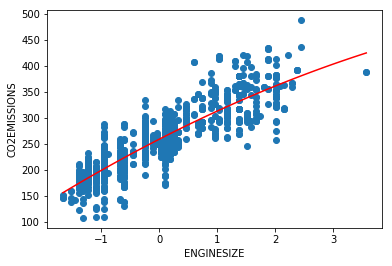

In [21]:
# Now, let's use all of the data to find the regression and plot the fitted curve on top of the data.

poly_features = PolynomialFeatures(degree=min_deg)
X_ENGINESIZE = X_ENGINESIZE.reshape(-1,1)
x_poly_train = poly_features.fit_transform(X_ENGINESIZE)
poly_reg = LinearRegression()
poly_reg.fit(x_poly_train, y)

XX = np.linspace(X_ENGINESIZE.min(), X_ENGINESIZE.max(), 100)
XX = XX.reshape(-1,1)
XX_poly = poly_features.fit_transform(XX)
yy = poly_reg.predict(XX_poly)

fig6, ax6 = plt.subplots()
plt.scatter(X_ENGINESIZE, y)
plt.plot(XX, yy, '-r')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

Best degree 2 with RMSE 34.99


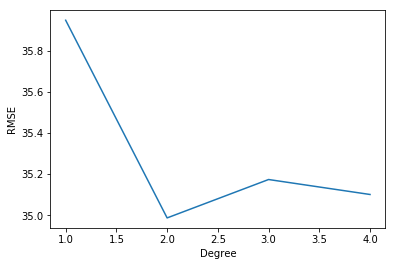

In [22]:
# Now, we repeat the same procedure for the next independent variable, i.e. CYLINDERS.

X_CYLINDERS = X[:,1]
X_train, X_test, y_train, y_test = train_test_split(X_CYLINDERS, y, test_size=0.2, random_state=0)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

rmses = []
degrees = np.arange(1, 5)
min_rmse, min_deg = 1e10, 0

for deg in degrees:
  
  # Train features
  poly_features = PolynomialFeatures(degree=deg)
  x_poly_train = poly_features.fit_transform(X_train)
  
  # Linear regression
  poly_reg = LinearRegression()
  poly_reg.fit(x_poly_train, y_train)
  
  # Compare with test data
  x_poly_test = poly_features.fit_transform(X_test)
  poly_predict = poly_reg.predict(x_poly_test)
  poly_mse = mean_squared_error(y_test, poly_predict)
  poly_rmse = np.sqrt(poly_mse)
  rmses.append(poly_rmse)
  
  # Cross-validation of degree
  if min_rmse > poly_rmse:
    min_rmse = poly_rmse
    min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {:.2f}'.format(min_deg, min_rmse))

fig7, ax7 = plt.subplots()
plt.plot(degrees, rmses)
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.show()

In [23]:
SVR_results = SVR_results.append(pd.DataFrame({"Independent Variable":["CYLINDERS"], "Order of Polynomial":[min_deg], "RMSE":[min_rmse]}), ignore_index=True)
print(SVR_results)

  Independent Variable  Order of Polynomial       RMSE
0           ENGINESIZE                    2  34.151673
1            CYLINDERS                    2  34.987041


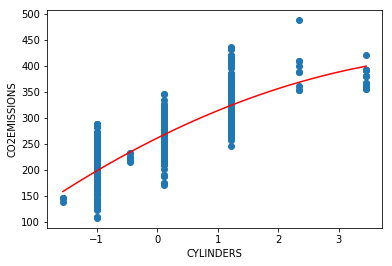

In [24]:
# Now, again let's use all of the data to find the regression and plot the fitted curve on top of the data.

poly_features = PolynomialFeatures(degree=min_deg)
X_CYLINDERS = X_CYLINDERS.reshape(-1,1)
x_poly_train = poly_features.fit_transform(X_CYLINDERS)
poly_reg = LinearRegression()
poly_reg.fit(x_poly_train, y)

XX = np.linspace(X_CYLINDERS.min(), X_CYLINDERS.max(), 100)
XX = XX.reshape(-1,1)
XX_poly = poly_features.fit_transform(XX)
yy = poly_reg.predict(XX_poly)

fig8, ax8 = plt.subplots()
plt.scatter(X_CYLINDERS, y)
plt.plot(XX, yy, '-r')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

Best degree 6 with RMSE 21.67


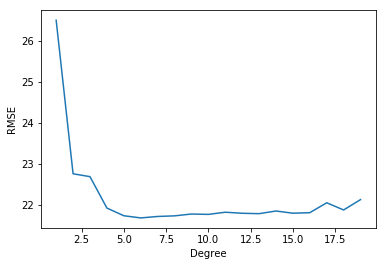

In [25]:
# Next, we consider FUELCONSUMPTION_CITY. Here we will run into an overfitting problem. But let's first use the same exact procedure as before nad plot our results.

X_FUELCONSUMPTION_CITY = X[:,2]
X_train, X_test, y_train, y_test = train_test_split(X_FUELCONSUMPTION_CITY, y, test_size=0.2, random_state=0)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

rmses = []
degrees = np.arange(1, 20)
min_rmse, min_deg = 1e10, 0

for deg in degrees:
  
  # Train features
  poly_features = PolynomialFeatures(degree=deg)
  x_poly_train = poly_features.fit_transform(X_train)
  
  # Linear regression
  poly_reg = LinearRegression()
  poly_reg.fit(x_poly_train, y_train)
  
  # Compare with test data
  x_poly_test = poly_features.fit_transform(X_test)
  poly_predict = poly_reg.predict(x_poly_test)
  poly_mse = mean_squared_error(y_test, poly_predict)
  poly_rmse = np.sqrt(poly_mse)
  rmses.append(poly_rmse)
  
  # Cross-validation of degree
  if min_rmse > poly_rmse:
    min_rmse = poly_rmse
    min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {:.2f}'.format(min_deg, min_rmse))

fig9, ax9 = plt.subplots()
plt.plot(degrees, rmses)
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.show()

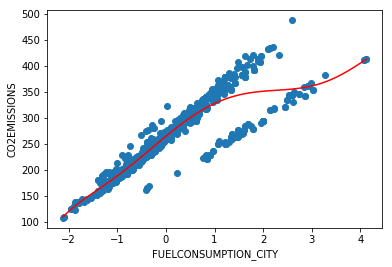

In [26]:
# I am skipping the step for adding our results to the SVR_results dataframe as I know this result is wrong.
# Now, let's plot our data and the fitted curve.

poly_features = PolynomialFeatures(degree=min_deg)
X_FUELCONSUMPTION_CITY = X_FUELCONSUMPTION_CITY.reshape(-1,1)
x_poly_train = poly_features.fit_transform(X_FUELCONSUMPTION_CITY)
poly_reg = LinearRegression()
poly_reg.fit(x_poly_train, y)

XX = np.linspace(X_FUELCONSUMPTION_CITY.min(), X_FUELCONSUMPTION_CITY.max(), 100)
XX = XX.reshape(-1,1)
XX_poly = poly_features.fit_transform(XX)
yy = poly_reg.predict(XX_poly)

fig10, ax10 = plt.subplots()
plt.scatter(X_FUELCONSUMPTION_CITY, y)
plt.plot(XX, yy, '-r')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [27]:
# As you can see in the plot above, we have a serious problem here with the FUELCONSUMPTION_CITY variable (and also with the FUELCONSUMPTION_HWY).
# The plot above does not represent a function in its mathematical sense. Some of the input variables have, i.e. FUELCONSUMPTION_CITY, have more than one outputs in the codomain.
# As such, by increasing the order of the polynomial we are just forcing the fitted curve to follow the trends of two different curves.
# Here, we have a decision to make. Do we drop some of the inputs? No.
# Do we add another independent variable to make a proper function? Not for now.
# Then what? We use linear regression jut so that it follows the general trend of the data as each part of this bifurcated data seems to be linear.

X_FUELCONSUMPTION_CITY = X[:,2]
X_train, X_test, y_train, y_test = train_test_split(X_FUELCONSUMPTION_CITY, y, test_size=0.2, random_state=0)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

deg = 1
  
# Linear regression
poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)
 
# Compare with test data
poly_predict = poly_reg.predict(X_test)
poly_mse = mean_squared_error(y_test, poly_predict)
min_rmse = np.sqrt(poly_mse)
min_deg = deg

SVR_results = SVR_results.append(pd.DataFrame({"Independent Variable":["FUELCONSUMPTION_CITY"], "Order of Polynomial":[min_deg], "RMSE":[min_rmse]}), ignore_index=True)
print(SVR_results)

   Independent Variable  Order of Polynomial       RMSE
0            ENGINESIZE                    2  34.151673
1             CYLINDERS                    2  34.987041
2  FUELCONSUMPTION_CITY                    1  26.504326


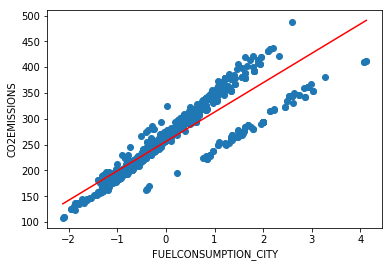

In [28]:
# Now, let's plot our results again

X_FUELCONSUMPTION_CITY = X_FUELCONSUMPTION_CITY.reshape(-1,1)
poly_reg = LinearRegression()
poly_reg.fit(X_FUELCONSUMPTION_CITY, y)

XX = np.linspace(X_FUELCONSUMPTION_CITY.min(), X_FUELCONSUMPTION_CITY.max(), 100)
XX = XX.reshape(-1,1)
yy = poly_reg.predict(XX)

fig11, ax11 = plt.subplots()
plt.scatter(X_FUELCONSUMPTION_CITY, y)
plt.plot(XX, yy, '-r')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [29]:
# Lastly, we treat the FUELCONSUMPTION_HWY the same as the FUELCONSUMPTION_CITY.

X_FUELCONSUMPTION_HWY = X[:,3]
X_train, X_test, y_train, y_test = train_test_split(X_FUELCONSUMPTION_HWY, y, test_size=0.2, random_state=0)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

deg = 1
  
# Linear regression
poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)
 
# Compare with test data
poly_predict = poly_reg.predict(X_test)
poly_mse = mean_squared_error(y_test, poly_predict)
min_rmse = np.sqrt(poly_mse)
min_deg = deg

SVR_results = SVR_results.append(pd.DataFrame({"Independent Variable":["FUELCONSUMPTION_HWY"], "Order of Polynomial":[min_deg], "RMSE":[min_rmse]}), ignore_index=True)
print(SVR_results)

   Independent Variable  Order of Polynomial       RMSE
0            ENGINESIZE                    2  34.151673
1             CYLINDERS                    2  34.987041
2  FUELCONSUMPTION_CITY                    1  26.504326
3   FUELCONSUMPTION_HWY                    1  31.436888


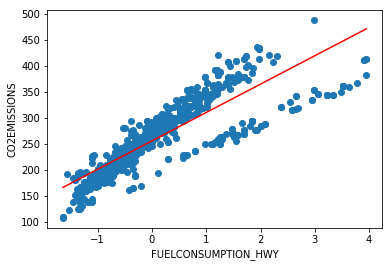

In [30]:
# Finally, we plot the last fitted curve.

X_FUELCONSUMPTION_HWY = X_FUELCONSUMPTION_HWY.reshape(-1,1)
poly_reg = LinearRegression()
poly_reg.fit(X_FUELCONSUMPTION_HWY, y)

XX = np.linspace(X_FUELCONSUMPTION_HWY.min(), X_FUELCONSUMPTION_HWY.max(), 100)
XX = XX.reshape(-1,1)
yy = poly_reg.predict(XX)

fig11, ax11 = plt.subplots()
plt.scatter(X_FUELCONSUMPTION_HWY, y)
plt.plot(XX, yy, '-r')
plt.xlabel("FUELCONSUMPTION_HWY")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [31]:
# Now, we want to perform multivariable polynomial regression based on the orders of the regressions that we found previously.
# X contains all of our independent variables, i.e. ENGINESIZE, CYLINDERS, FUELCONSUMPTION_CITY & FUELCONSUMPTION_HWY
# First, we have to assemble the polynomial matrix. However, we want to have second-order terms for ENGINESIZE AND CYLINDERS but only keep the first order terms for the fuel consumptions inputs.
# So, we need to delete the columns that contains the second order terms for the fuel consumptions. We know that if we have 4 variables, for a second degree polynomial we will have 15 terms in total.
# With how PolynomialFeatures construct the polynomial matrix, in this case, the 13th and 15th terms would correspond to the second order terms for FUELCONSUMPTION_CITY & FUELCONSUMPTION_HWY.
# So, after constructing the polynomial matrix, I will delete those columns.

deg = 2
poly_features = PolynomialFeatures(degree=deg)
X_multi_poly = poly_features.fit_transform(X)
X_multi_poly = np.delete(X_multi_poly, [12, 14], axis=1)
print(X_multi_poly.shape)

(1067, 13)


In [32]:
# I am going to use the K-fold Cross Validation method to calculate the accuracy of the model.
# I did not do so before, because, in the previous steps, my goal was not find the most comprehensive regression model. My goal was just to find the best order of regression for each independent variable.
# Now, let's use the K-fold method to construct our trainin & testing datasets. I will be using k=11 to get folds with the same number of data.
# In machine learning k=10 is usually a good number of folds to use.

from sklearn.model_selection import KFold
n_kf = 11
kf = KFold(n_splits=n_kf, shuffle=True, random_state=1)

MP_rmses = []

for train_index, test_index in kf.split(X_multi_poly):
  
  # Find the training and testing arrays
  X_train, X_test = X_multi_poly[train_index], X_multi_poly[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # Linear Regression
  multi_poly_reg = LinearRegression()
  multi_poly_reg.fit(X_train, y_train)
  
  # Compare with test data
  multi_poly_predict = multi_poly_reg.predict(X_test)
  multi_poly_rmse = np.sqrt(mean_squared_error(y_test, multi_poly_predict))
  MP_rmses.append(multi_poly_rmse)

# Present the averaged accuracy of the model.
print('The averaged RMSE over the {} folds is {:.2f}'  .format(n_kf, np.mean(MP_rmses)))

# I am going to also show the accuracy of the previous single-variable regressions models again just for the sake of comparison.
print(SVR_results)

The averaged RMSE over the 11 folds is 19.58
   Independent Variable  Order of Polynomial       RMSE
0            ENGINESIZE                    2  34.151673
1             CYLINDERS                    2  34.987041
2  FUELCONSUMPTION_CITY                    1  26.504326
3   FUELCONSUMPTION_HWY                    1  31.436888
